<a href="https://colab.research.google.com/github/Sid-Oya/DS-Builds/blob/master/Sidoney_Daley_DS_Unit1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import normaltest
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import cufflinks as cf
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import my first dataset - Crime in NY State
**bold text**

In [ ]:
url1 = 'https://data.ny.gov/api/views/ca8h-8gjq/rows.csv?accessType=DOWNLOAD&sorting=true'
crimes = pd.read_csv(url1)
crimes.head()


,County,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2018,12.0,3968.0,822.0,12.0,51.0,209.0,550.0,3146.0,432.0,2584.0,130.0,Non-New York City
1,Albany,Albany County Park PD,2018,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Non-New York City
2,Albany,Albany County Sheriff,2018,12.0,130.0,16.0,0.0,6.0,0.0,10.0,114.0,19.0,82.0,13.0,Non-New York City
3,Albany,Albany County State Police,2018,12.0,158.0,30.0,0.0,25.0,0.0,5.0,128.0,5.0,121.0,2.0,Non-New York City
4,Albany,Altamont Vg PD,2018,12.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,Non-New York City


In [ ]:
crimes.shape

(19956, 15)

In [ ]:
crimes['County'].value_counts()

Westchester    1340
Orange         1022
Erie            792
Suffolk         769
Nassau          727
               ... 
Queens           29
New York         29
Richmond         29
Bronx            29
Kings            29
Name: County, Length: 63, dtype: int64

In [ ]:
crimes.dtypes

County                  object
Agency                  object
Year                     int64
Months Reported        float64
Index Total            float64
Violent Total          float64
Murder                 float64
Rape                   float64
Robbery                float64
Aggravated Assault     float64
Property Total         float64
Burglary               float64
Larceny                float64
Motor Vehicle Theft    float64
Region                  object
dtype: object

In [ ]:
crimes.isnull().values.any()

True

In [ ]:
crimes.isnull().sum().sum()

13219

## New dataframe with the replace of nan values


In [ ]:
crimesN = crimes.replace(np.nan,0)
crimesN

,County,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2018,12.0,3968.0,822.0,12.0,51.0,209.0,550.0,3146.0,432.0,2584.0,130.0,Non-New York City
1,Albany,Albany County Park PD,2018,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Non-New York City
2,Albany,Albany County Sheriff,2018,12.0,130.0,16.0,0.0,6.0,0.0,10.0,114.0,19.0,82.0,13.0,Non-New York City
3,Albany,Albany County State Police,2018,12.0,158.0,30.0,0.0,25.0,0.0,5.0,128.0,5.0,121.0,2.0,Non-New York City
4,Albany,Altamont Vg PD,2018,12.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,Non-New York City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,Yates,County Total,1990,0.0,507.0,34.0,0.0,5.0,0.0,29.0,473.0,104.0,361.0,8.0,Non-New York City
19952,Yates,Penn Yan Vg PD,1990,0.0,142.0,3.0,0.0,1.0,0.0,2.0,139.0,11.0,123.0,5.0,Non-New York City
19953,Yates,Yates County Park PD,1990,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Non-New York City
19954,Yates,Yates County Sheriff,1990,0.0,318.0,29.0,0.0,4.0,0.0,25.0,289.0,84.0,202.0,3.0,Non-New York City


In [ ]:
crimesN.isnull().values.any()

False

In [ ]:
crimesN['County'].value_counts(dropna=False)


Westchester    1340
Orange         1022
Erie            792
Suffolk         769
Nassau          727
               ... 
Queens           29
New York         29
Richmond         29
Bronx            29
Kings            29
Name: County, Length: 63, dtype: int64

## New dataframe with columns dropped 


In [ ]:
crimesD = crimesN.drop(columns=['Agency', 'Region','Months Reported', 'Index Total'])
crimesD.head()

,County,Year,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,Albany,2018,822.0,12.0,51.0,209.0,550.0,3146.0,432.0,2584.0,130.0
1,Albany,2018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albany,2018,16.0,0.0,6.0,0.0,10.0,114.0,19.0,82.0,13.0
3,Albany,2018,30.0,0.0,25.0,0.0,5.0,128.0,5.0,121.0,2.0
4,Albany,2018,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0


## New dataframe to do a Grouby and Reset the Index


In [ ]:
CrimesC = crimesD.groupby(['County', 'Year']).sum().reset_index()
CrimesC.sort_values(['County', 'Year'], ascending=False)
CrimesC.head()

,County,Year,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,Albany,1990,3043.0,24.0,237.0,899.0,1883.0,25331.0,6311.0,17608.0,1412.0
1,Albany,1991,3338.0,26.0,180.0,1162.0,1970.0,27096.0,6527.0,19074.0,1495.0
2,Albany,1992,3157.0,22.0,192.0,1107.0,1836.0,28763.0,6880.0,20289.0,1594.0
3,Albany,1993,3316.0,16.0,160.0,1105.0,2035.0,26402.0,6441.0,18622.0,1339.0
4,Albany,1994,3520.0,26.0,202.0,1284.0,2008.0,29340.0,6782.0,20951.0,1607.0


## Create a new column


In [ ]:
CrimesC['NYC'] = 'All Others'
CrimesC[['NYC', 'County']].head()

,NYC,County
0,All Others,Albany
1,All Others,Albany
2,All Others,Albany
3,All Others,Albany
4,All Others,Albany


## Replicate certain values from an exisitng column into the new column


In [ ]:
CrimesC.loc[CrimesC['County'] == 'Richmond', 'NYC'] = 'Staten Island'
CrimesC[['NYC', 'County']].sample(10)

,NYC,County
1092,All Others,Oswego
620,All Others,Herkimer
999,All Others,Ontario
1141,All Others,Putnam
1486,All Others,Steuben
223,All Others,Chemung
737,All Others,Livingston
1557,All Others,Tioga
278,All Others,Clinton
547,All Others,Genesee


In [ ]:
CrimesC.loc[CrimesC['County']=='Kings', 'NYC']='Brooklyn'
CrimesC.loc[CrimesC['County']== 'Queens', 'NYC']='Queens'
CrimesC.loc[CrimesC['County']== 'New York', 'NYC']= 'Manhattan'
CrimesC.loc[CrimesC['County']== 'Bronx', 'NYC']= 'Bronx'
CrimesC.loc[CrimesC['County']== 'Nassau','NYC']= 'Long Island'
CrimesC.loc[CrimesC['County']== 'Suffolk', 'NYC']= 'Long Island'
CrimesC[['NYC', 'County']].sample(10)

,NYC,County
397,All Others,Dutchess
1459,All Others,St Lawrence
817,All Others,Montgomery
104,All Others,Broome
1655,All Others,Warren
1262,Staten Island,Richmond
1272,All Others,Rockland
899,All Others,Niagara
1227,All Others,Rensselaer
1652,All Others,Warren


In [ ]:
CrimesC['NYC'].value_counts()

All Others       1613
Long Island        58
Staten Island      29
Bronx              29
Brooklyn           29
Manhattan          29
Queens             29
Name: NYC, dtype: int64

In [ ]:
CrimesC.head()

,County,Year,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,NYC
0,Albany,1990,3043.0,24.0,237.0,899.0,1883.0,25331.0,6311.0,17608.0,1412.0,All Others
1,Albany,1991,3338.0,26.0,180.0,1162.0,1970.0,27096.0,6527.0,19074.0,1495.0,All Others
2,Albany,1992,3157.0,22.0,192.0,1107.0,1836.0,28763.0,6880.0,20289.0,1594.0,All Others
3,Albany,1993,3316.0,16.0,160.0,1105.0,2035.0,26402.0,6441.0,18622.0,1339.0,All Others
4,Albany,1994,3520.0,26.0,202.0,1284.0,2008.0,29340.0,6782.0,20951.0,1607.0,All Others


## New dataframe to do a Grouby and Reset the Index


In [ ]:
CrimesNYC = CrimesC.groupby(['County', 'Year','NYC']).sum().reset_index()
CrimesNYC.sort_values(['County', 'Year', 'NYC'], ascending=False)
CrimesNYC.head()

,County,Year,NYC,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,Albany,1990,All Others,3043.0,24.0,237.0,899.0,1883.0,25331.0,6311.0,17608.0,1412.0
1,Albany,1991,All Others,3338.0,26.0,180.0,1162.0,1970.0,27096.0,6527.0,19074.0,1495.0
2,Albany,1992,All Others,3157.0,22.0,192.0,1107.0,1836.0,28763.0,6880.0,20289.0,1594.0
3,Albany,1993,All Others,3316.0,16.0,160.0,1105.0,2035.0,26402.0,6441.0,18622.0,1339.0
4,Albany,1994,All Others,3520.0,26.0,202.0,1284.0,2008.0,29340.0,6782.0,20951.0,1607.0


## Sort dataframe by specific columns in descending order 

In [ ]:
CrimesNYC.sort_values(["NYC","Year"], axis=0, 
                 ascending=False, inplace=True)
CrimesNYC.head()

,County,Year,NYC,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
1264,Richmond,2018,Staten Island,1408.0,10.0,128.0,327.0,943.0,4330.0,342.0,3803.0,185.0
1263,Richmond,2017,Staten Island,1451.0,13.0,90.0,328.0,1020.0,4518.0,401.0,3883.0,234.0
1262,Richmond,2016,Staten Island,1589.0,21.0,99.0,422.0,1047.0,4724.0,488.0,3989.0,247.0
1261,Richmond,2015,Staten Island,1651.0,14.0,94.0,456.0,1087.0,4814.0,557.0,4038.0,219.0
1260,Richmond,2014,Staten Island,1551.0,15.0,31.0,417.0,1088.0,5314.0,589.0,4505.0,220.0


## Test - seaborn bar graph


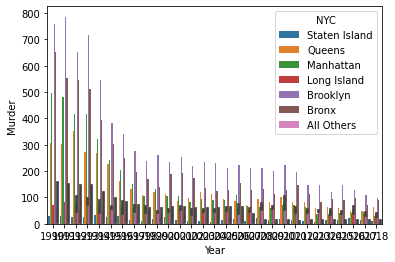

In [ ]:
NYCSI = sns.barplot(x="Year", y="Murder", hue="NYC", data=CrimesNYC)

## New dataframe with set index to conduct a drop by index


In [ ]:
Cnycd = CrimesNYC.set_index("NYC")
Cnycd

,County,Year,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
NYC,,,,,,,,,,,
Staten Island,Richmond,2018,1408.0,10.0,128.0,327.0,943.0,4330.0,342.0,3803.0,185.0
Staten Island,Richmond,2017,1451.0,13.0,90.0,328.0,1020.0,4518.0,401.0,3883.0,234.0
Staten Island,Richmond,2016,1589.0,21.0,99.0,422.0,1047.0,4724.0,488.0,3989.0,247.0
Staten Island,Richmond,2015,1651.0,14.0,94.0,456.0,1087.0,4814.0,557.0,4038.0,219.0
Staten Island,Richmond,2014,1551.0,15.0,31.0,417.0,1088.0,5314.0,589.0,4505.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...
All Others,Washington,1990,360.0,0.0,24.0,20.0,316.0,2464.0,588.0,1784.0,92.0
All Others,Wayne,1990,358.0,10.0,38.0,48.0,262.0,4850.0,1086.0,3626.0,138.0
All Others,Westchester,1990,7742.0,100.0,256.0,3854.0,3532.0,68548.0,12930.0,43128.0,12490.0


In [ ]:
Cnyc = Cnycd.drop("All Others", axis=0)
Cnyc.head()

,County,Year,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
NYC,,,,,,,,,,,
Staten Island,Richmond,2018,1408.0,10.0,128.0,327.0,943.0,4330.0,342.0,3803.0,185.0
Staten Island,Richmond,2017,1451.0,13.0,90.0,328.0,1020.0,4518.0,401.0,3883.0,234.0
Staten Island,Richmond,2016,1589.0,21.0,99.0,422.0,1047.0,4724.0,488.0,3989.0,247.0
Staten Island,Richmond,2015,1651.0,14.0,94.0,456.0,1087.0,4814.0,557.0,4038.0,219.0
Staten Island,Richmond,2014,1551.0,15.0,31.0,417.0,1088.0,5314.0,589.0,4505.0,220.0


In [ ]:
Cnyc.shape

(203, 11)

## Reseting the index after a drop of variables


In [ ]:
CnycI = Cnyc.reset_index()
CnycI.head()

,NYC,County,Year,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,Staten Island,Richmond,2018,1408.0,10.0,128.0,327.0,943.0,4330.0,342.0,3803.0,185.0
1,Staten Island,Richmond,2017,1451.0,13.0,90.0,328.0,1020.0,4518.0,401.0,3883.0,234.0
2,Staten Island,Richmond,2016,1589.0,21.0,99.0,422.0,1047.0,4724.0,488.0,3989.0,247.0
3,Staten Island,Richmond,2015,1651.0,14.0,94.0,456.0,1087.0,4814.0,557.0,4038.0,219.0
4,Staten Island,Richmond,2014,1551.0,15.0,31.0,417.0,1088.0,5314.0,589.0,4505.0,220.0


## New dataframe with set index to conduct a drop by index


In [ ]:
CnycY = CnycI.set_index("Year")
CnycY

,NYC,County,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
Year,,,,,,,,,,,
2018,Staten Island,Richmond,1408.0,10.0,128.0,327.0,943.0,4330.0,342.0,3803.0,185.0
2017,Staten Island,Richmond,1451.0,13.0,90.0,328.0,1020.0,4518.0,401.0,3883.0,234.0
2016,Staten Island,Richmond,1589.0,21.0,99.0,422.0,1047.0,4724.0,488.0,3989.0,247.0
2015,Staten Island,Richmond,1651.0,14.0,94.0,456.0,1087.0,4814.0,557.0,4038.0,219.0
2014,Staten Island,Richmond,1551.0,15.0,31.0,417.0,1088.0,5314.0,589.0,4505.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...
1994,Bronx,Bronx,27863.0,393.0,546.0,13998.0,12926.0,56467.0,16440.0,25420.0,14607.0
1993,Bronx,Bronx,31235.0,512.0,606.0,16386.0,13731.0,60692.0,18763.0,26273.0,15656.0
1992,Bronx,Bronx,31050.0,547.0,566.0,16465.0,13472.0,61501.0,17699.0,26070.0,17732.0


In [ ]:
CnycYd = CnycY.drop([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2018], axis=0)
CnycYd.head()

,NYC,County,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
Year,,,,,,,,,,,
2017,Staten Island,Richmond,1451.0,13.0,90.0,328.0,1020.0,4518.0,401.0,3883.0,234.0
2016,Staten Island,Richmond,1589.0,21.0,99.0,422.0,1047.0,4724.0,488.0,3989.0,247.0
2015,Staten Island,Richmond,1651.0,14.0,94.0,456.0,1087.0,4814.0,557.0,4038.0,219.0
2014,Staten Island,Richmond,1551.0,15.0,31.0,417.0,1088.0,5314.0,589.0,4505.0,220.0
2013,Staten Island,Richmond,1658.0,7.0,32.0,526.0,1093.0,5576.0,669.0,4681.0,226.0


In [ ]:
CnycYd.shape

(112, 11)

## Reset Index after a drop


In [ ]:
NYCcrimes = CnycYd.reset_index()
NYCcrimes.head()

,Year,NYC,County,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,2017,Staten Island,Richmond,1451.0,13.0,90.0,328.0,1020.0,4518.0,401.0,3883.0,234.0
1,2016,Staten Island,Richmond,1589.0,21.0,99.0,422.0,1047.0,4724.0,488.0,3989.0,247.0
2,2015,Staten Island,Richmond,1651.0,14.0,94.0,456.0,1087.0,4814.0,557.0,4038.0,219.0
3,2014,Staten Island,Richmond,1551.0,15.0,31.0,417.0,1088.0,5314.0,589.0,4505.0,220.0
4,2013,Staten Island,Richmond,1658.0,7.0,32.0,526.0,1093.0,5576.0,669.0,4681.0,226.0


## Create a new column by adding the values of two preexisting columns


In [ ]:
NYCcrimes["Total Crimes"] = NYCcrimes["Violent Total"] + NYCcrimes["Property Total"]
NYCcrimes.head()

,Year,NYC,County,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Total Crimes
0,2017,Staten Island,Richmond,1451.0,13.0,90.0,328.0,1020.0,4518.0,401.0,3883.0,234.0,5969.0
1,2016,Staten Island,Richmond,1589.0,21.0,99.0,422.0,1047.0,4724.0,488.0,3989.0,247.0,6313.0
2,2015,Staten Island,Richmond,1651.0,14.0,94.0,456.0,1087.0,4814.0,557.0,4038.0,219.0,6465.0
3,2014,Staten Island,Richmond,1551.0,15.0,31.0,417.0,1088.0,5314.0,589.0,4505.0,220.0,6865.0
4,2013,Staten Island,Richmond,1658.0,7.0,32.0,526.0,1093.0,5576.0,669.0,4681.0,226.0,7234.0


In [ ]:
NYCcrimes['NYC'].value_counts()

Long Island      32
Manhattan        16
Staten Island    16
Bronx            16
Brooklyn         16
Queens           16
Name: NYC, dtype: int64

## Create a graph to visualize the rate of crime in NYC for the years 2002- 2017


In [ ]:
fig1 = px.bar(NYCcrimes, x='Year', y='Total Crimes',
             hover_data=['NYC'], color='NYC',
             labels={'Total Crimes':'Total Crimes'})
fig1.show()

In [ ]:
!pip install chart_studio
import chart_studio

In [ ]:
username = 'Sid-Oya' # your username
api_key = 'vpIM8elq3MbbSwTWeB6n' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username='Sid-Oya', api_key='vpIM8elq3MbbSwTWeB6n')

In [ ]:
import chart_studio.plotly as py
py.plot(fig1, filename = 'NYCcrimesTotal', auto_open=True)

'https://plotly.com/~Sid-Oya/1/'

## Create graphs to visualize the rate of various crimes in the 5 boroughs of NYC plus Long Island for the years 2002- 2017

In [ ]:
fig2 = px.bar(NYCcrimes, x="Year", y="Violent Total",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig2.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig2, filename = 'NYCcrimesVT', auto_open=True)

'https://plotly.com/~Sid-Oya/3/'

In [ ]:
fig3 = px.bar(NYCcrimes, x="Year", y="Murder",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig3.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig3, filename = 'NYCcrimesM', auto_open=True)

'https://plotly.com/~Sid-Oya/5/'

In [ ]:
fig4 = px.bar(NYCcrimes, x="Year", y="Rape",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig4.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig4, filename = 'NYCcrimesR', auto_open=True)

'https://plotly.com/~Sid-Oya/7/'

In [ ]:
fig5 = px.bar(NYCcrimes, x="Year", y="Robbery",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig5.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig5, filename = 'NYCcrimesRob', auto_open=True)

'https://plotly.com/~Sid-Oya/9/'

In [ ]:
fig6 = px.bar(NYCcrimes, x="Year", y="Aggravated Assault",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig6.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig6, filename = 'NYCcrimesAA', auto_open=True)

'https://plotly.com/~Sid-Oya/11/'

In [ ]:
fig7 = px.bar(NYCcrimes, x="Year", y="Property Total",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig7.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig7, filename = 'NYCcrimesPT', auto_open=True)

'https://plotly.com/~Sid-Oya/13/'

In [ ]:
fig8 = px.bar(NYCcrimes, x="Year", y="Burglary",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig8.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig8, filename = 'NYCcrimesB', auto_open=True)

'https://plotly.com/~Sid-Oya/15/'

In [ ]:
fig9 = px.bar(NYCcrimes, x="Year", y="Larceny",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig9.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig9, filename = 'NYCcrimesL', auto_open=True)

'https://plotly.com/~Sid-Oya/17/'

In [ ]:
fig10 = px.bar(NYCcrimes, x="Year", y="Motor Vehicle Theft",barmode="group",
              facet_col="NYC", color="NYC",
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig10.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig10, filename = 'NYCcrimesMVT', auto_open=True)

'https://plotly.com/~Sid-Oya/19/'

## Import my second dataset - Citizen Complaints against the NYPD

In [ ]:
url2 = 'https://data.cityofnewyork.us/api/views/63nx-cpi9/rows.csv?accessType=DOWNLOAD'
complaints = pd.read_csv(url2)
complaints.head()

,Extract Run Date,Randomized Id,CCRB Received Year,Days Between Incident Date and Received Date,Case Type,Complaint Received Place,Complaint Received Mode,Borough Of Incident,Patrol Borough Of Incident,Reason For Initial Contact
0,05/25/2018,1,2000,2.0,IAB,CCRB,Phone,Bronx,Bronx,PD suspected C/V of violation/crime - street
1,05/25/2018,2,2000,86.0,OCD,Other NYPD unit,In-person,Brooklyn,Brooklyn North,Parking violation
2,05/25/2018,3,2000,0.0,OCD,CCRB,Phone,Queens,Other,NaN
3,05/25/2018,4,2000,0.0,OCD,Other NYPD unit,Phone,Bronx,Bronx,NaN
4,05/25/2018,5,2000,117.0,OCD,CCRB,Phone,Manhattan,Manhattan North,Traffic accident


In [ ]:
complaints.shape

(238383, 10)

In [ ]:
complaints.dtypes

Extract Run Date                                 object
Randomized Id                                     int64
CCRB Received Year                                int64
Days Between Incident Date and Received Date    float64
Case Type                                        object
Complaint Received Place                         object
Complaint Received Mode                          object
Borough Of Incident                              object
Patrol Borough Of Incident                       object
Reason For Initial Contact                       object
dtype: object

In [ ]:
complaints.isnull().values.any()

True

In [ ]:
complaints.isnull().sum().sum()

16870

## Create new dataframe due to replace of nan values


In [ ]:
complaintsN = complaints.replace(np.nan, 0)
complaintsN

,Extract Run Date,Randomized Id,CCRB Received Year,Days Between Incident Date and Received Date,Case Type,Complaint Received Place,Complaint Received Mode,Borough Of Incident,Patrol Borough Of Incident,Reason For Initial Contact
0,05/25/2018,1,2000,2.0,IAB,CCRB,Phone,Bronx,Bronx,PD suspected C/V of violation/crime - street
1,05/25/2018,2,2000,86.0,OCD,Other NYPD unit,In-person,Brooklyn,Brooklyn North,Parking violation
2,05/25/2018,3,2000,0.0,OCD,CCRB,Phone,Queens,Other,0
3,05/25/2018,4,2000,0.0,OCD,Other NYPD unit,Phone,Bronx,Bronx,0
4,05/25/2018,5,2000,117.0,OCD,CCRB,Phone,Manhattan,Manhattan North,Traffic accident
...,...,...,...,...,...,...,...,...,...,...
238378,05/25/2018,238379,2017,20.0,CCRB,CCRB,Phone,Queens,Queens South,PD suspected C/V of violation/crime - auto
238379,05/25/2018,238380,2017,7.0,CCRB,IAB,Phone,Bronx,Bronx,PD suspected C/V of violation/crime - bldg
238380,05/25/2018,238381,2017,0.0,IAB,Mayor's Office,E-mail,0,Other,0
238381,05/25/2018,238382,2017,0.0,CCRB,CCRB,On-line website,Manhattan,Manhattan South,Other violation of VTL


In [ ]:
complaintsN['CCRB Received Year'].value_counts()

2009    19091
2008    18001
2007    17965
2010    17034
2006    16711
2011    16082
2005    14976
2012    14668
2004    12572
2014    12562
2013    11536
2015    10797
2017    10578
2016    10524
2003    10050
2000     8709
2002     8466
2001     8061
Name: CCRB Received Year, dtype: int64

##  New dataframe with set index to conduct a drop by index


In [ ]:
complaintsY = complaintsN.set_index("CCRB Received Year")
complaintsY

,Extract Run Date,Randomized Id,Days Between Incident Date and Received Date,Case Type,Complaint Received Place,Complaint Received Mode,Borough Of Incident,Patrol Borough Of Incident,Reason For Initial Contact
CCRB Received Year,,,,,,,,,
2000,05/25/2018,1,2.0,IAB,CCRB,Phone,Bronx,Bronx,PD suspected C/V of violation/crime - street
2000,05/25/2018,2,86.0,OCD,Other NYPD unit,In-person,Brooklyn,Brooklyn North,Parking violation
2000,05/25/2018,3,0.0,OCD,CCRB,Phone,Queens,Other,0
2000,05/25/2018,4,0.0,OCD,Other NYPD unit,Phone,Bronx,Bronx,0
2000,05/25/2018,5,117.0,OCD,CCRB,Phone,Manhattan,Manhattan North,Traffic accident
...,...,...,...,...,...,...,...,...,...
2017,05/25/2018,238379,20.0,CCRB,CCRB,Phone,Queens,Queens South,PD suspected C/V of violation/crime - auto
2017,05/25/2018,238380,7.0,CCRB,IAB,Phone,Bronx,Bronx,PD suspected C/V of violation/crime - bldg
2017,05/25/2018,238381,0.0,IAB,Mayor's Office,E-mail,0,Other,0


In [ ]:
complaintsYd = complaintsY.drop([2000, 2001], axis=0)
complaintsYd.head()

,Extract Run Date,Randomized Id,Days Between Incident Date and Received Date,Case Type,Complaint Received Place,Complaint Received Mode,Borough Of Incident,Patrol Borough Of Incident,Reason For Initial Contact
CCRB Received Year,,,,,,,,,
2002,05/25/2018,16771,12.0,CCRB,IAB,Phone,Staten Island,Staten Island,Report-dispute
2002,05/25/2018,16772,6.0,CCRB,IAB,Phone,Bronx,Bronx,Report-domestic dispute
2002,05/25/2018,16773,514.0,OCD,CCRB,Mail,Bronx,Bronx,PD suspected C/V of violation/crime - street
2002,05/25/2018,16774,38.0,CCRB,IAB,Phone,Manhattan,Manhattan North,PD suspected C/V of violation/crime - street
2002,05/25/2018,16775,107.0,OCD,CCRB,Phone,Queens,Queens North,Other


## Reset index after droping select variables

In [ ]:
NYCcomplaints = complaintsYd.reset_index()
NYCcomplaints.head()

,CCRB Received Year,Extract Run Date,Randomized Id,Days Between Incident Date and Received Date,Case Type,Complaint Received Place,Complaint Received Mode,Borough Of Incident,Patrol Borough Of Incident,Reason For Initial Contact
0,2002,05/25/2018,16771,12.0,CCRB,IAB,Phone,Staten Island,Staten Island,Report-dispute
1,2002,05/25/2018,16772,6.0,CCRB,IAB,Phone,Bronx,Bronx,Report-domestic dispute
2,2002,05/25/2018,16773,514.0,OCD,CCRB,Mail,Bronx,Bronx,PD suspected C/V of violation/crime - street
3,2002,05/25/2018,16774,38.0,CCRB,IAB,Phone,Manhattan,Manhattan North,PD suspected C/V of violation/crime - street
4,2002,05/25/2018,16775,107.0,OCD,CCRB,Phone,Queens,Queens North,Other


In [ ]:
NYCcomplaints['Borough Of Incident'].value_counts()

Brooklyn         69721
Manhattan        56117
Bronx            42988
Queens           37853
Staten Island     9100
0                 4846
Outside NYC        988
Name: Borough Of Incident, dtype: int64

## Create a new column by duplicating an exisiting column


In [ ]:
NYCcomplaints['NYC'] = NYCcomplaints['Borough Of Incident']
NYCcomplaints.head()

,CCRB Received Year,Extract Run Date,Randomized Id,Days Between Incident Date and Received Date,Case Type,Complaint Received Place,Complaint Received Mode,Borough Of Incident,Patrol Borough Of Incident,Reason For Initial Contact,NYC
0,2002,05/25/2018,16771,12.0,CCRB,IAB,Phone,Staten Island,Staten Island,Report-dispute,Staten Island
1,2002,05/25/2018,16772,6.0,CCRB,IAB,Phone,Bronx,Bronx,Report-domestic dispute,Bronx
2,2002,05/25/2018,16773,514.0,OCD,CCRB,Mail,Bronx,Bronx,PD suspected C/V of violation/crime - street,Bronx
3,2002,05/25/2018,16774,38.0,CCRB,IAB,Phone,Manhattan,Manhattan North,PD suspected C/V of violation/crime - street,Manhattan
4,2002,05/25/2018,16775,107.0,OCD,CCRB,Phone,Queens,Queens North,Other,Queens


## Create a new column by duplicating an eexisiting column


In [ ]:
NYCcomplaints['Year'] = NYCcomplaints['CCRB Received Year']
NYCcomplaints.head()

,CCRB Received Year,Extract Run Date,Randomized Id,Days Between Incident Date and Received Date,Case Type,Complaint Received Place,Complaint Received Mode,Borough Of Incident,Patrol Borough Of Incident,Reason For Initial Contact,NYC,Year
0,2002,05/25/2018,16771,12.0,CCRB,IAB,Phone,Staten Island,Staten Island,Report-dispute,Staten Island,2002
1,2002,05/25/2018,16772,6.0,CCRB,IAB,Phone,Bronx,Bronx,Report-domestic dispute,Bronx,2002
2,2002,05/25/2018,16773,514.0,OCD,CCRB,Mail,Bronx,Bronx,PD suspected C/V of violation/crime - street,Bronx,2002
3,2002,05/25/2018,16774,38.0,CCRB,IAB,Phone,Manhattan,Manhattan North,PD suspected C/V of violation/crime - street,Manhattan,2002
4,2002,05/25/2018,16775,107.0,OCD,CCRB,Phone,Queens,Queens North,Other,Queens,2002


## Create a new dataframe by dropping several columns


In [ ]:
NYCcomplaintsD = NYCcomplaints.drop(columns=['CCRB Received Year', 'Extract Run Date', 'Randomized Id','Days Between Incident Date and Received Date', 
                                      'Complaint Received Place', 'Complaint Received Mode', 'Borough Of Incident', 'Patrol Borough Of Incident',
                                       'Reason For Initial Contact'])
NYCcomplaintsD.head()

,Case Type,NYC,Year
0,CCRB,Staten Island,2002
1,CCRB,Bronx,2002
2,OCD,Bronx,2002
3,CCRB,Manhattan,2002
4,OCD,Queens,2002


In [ ]:
NYCcomplaintsD['NYC'].value_counts()

Brooklyn         69721
Manhattan        56117
Bronx            42988
Queens           37853
Staten Island     9100
0                 4846
Outside NYC        988
Name: NYC, dtype: int64

## Rename a variable within an specific column

In [ ]:
NYCcomplaintsDR = NYCcomplaintsD.replace({'NYC': 0}, 'Long Island')
NYCcomplaintsDR.head()

,Case Type,NYC,Year
0,CCRB,Staten Island,2002
1,CCRB,Bronx,2002
2,OCD,Bronx,2002
3,CCRB,Manhattan,2002
4,OCD,Queens,2002


In [ ]:
NYCcomplaintsDR['NYC'].value_counts()

Brooklyn         69721
Manhattan        56117
Bronx            42988
Queens           37853
Staten Island     9100
Long Island       4846
Outside NYC        988
Name: NYC, dtype: int64

## Rename a column

In [ ]:
NYCcomplaintsDRR = NYCcomplaintsDR.rename(columns={"Case Type": "Citizens Complaints Against NYPD"})

## Conduct a Grouby and then Reset index

In [ ]:
NYCcomplaintsG = NYCcomplaintsDRR.groupby(['Year', 'NYC']).count().reset_index()
NYCcomplaintsG.head()

,Year,NYC,Citizens Complaints Against NYPD
0,2002,Bronx,1518
1,2002,Brooklyn,2591
2,2002,Long Island,97
3,2002,Manhattan,2312
4,2002,Outside NYC,40


## Create a visualization of citizen complaints against the NYPD in the NY from 2002 to 2017


In [ ]:
fig11 = px.bar(NYCcomplaintsG, x="Year", y="Citizens Complaints Against NYPD",barmode="overlay",
               facet_col="NYC", color = 'Citizens Complaints Against NYPD',
             category_orders={"NYC": ["Long Island", "Manhattan", "Staten Island", "Bronx", "Brooklyn", "Queens"]})
fig11.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig11, filename = 'NYCcomplaints', auto_open=True)

'https://plotly.com/~Sid-Oya/21/'

## Merge Two 'cleaned' Dataframes

In [ ]:
NYCcrimes_complaints = pd.merge(NYCcomplaintsG, NYCcrimes, how='inner')
NYCcrimes_complaints

,Year,NYC,Citizens Complaints Against NYPD,County,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Total Crimes
0,2002,Bronx,1518,Bronx,14112.0,172.0,443.0,5215.0,8282.0,29923.0,5057.0,19585.0,5281.0,44035.0
1,2002,Brooklyn,2591,Kings,22466.0,221.0,636.0,9980.0,11629.0,51241.0,10139.0,32728.0,8374.0,73707.0
2,2002,Long Island,97,Nassau,5414.0,56.0,232.0,2256.0,2870.0,40984.0,5624.0,29664.0,5696.0,46398.0
3,2002,Long Island,97,Suffolk,6248.0,38.0,338.0,1992.0,3880.0,67166.0,10422.0,50516.0,6228.0,73414.0
4,2002,Manhattan,2312,New York,13211.0,84.0,290.0,5965.0,6872.0,54941.0,5771.0,45801.0,3369.0,68152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2017,Long Island,359,Nassau,3310.0,34.0,82.0,1202.0,1992.0,24930.0,2244.0,21372.0,1314.0,28240.0
108,2017,Long Island,359,Suffolk,3496.0,44.0,322.0,1074.0,2056.0,39426.0,3358.0,33856.0,2212.0,42922.0
109,2017,Manhattan,2564,New York,8671.0,46.0,530.0,2749.0,5346.0,38475.0,2215.0,35622.0,638.0,47146.0
110,2017,Queens,1969,Queens,9184.0,50.0,495.0,2851.0,5788.0,23676.0,2721.0,19373.0,1582.0,32860.0


## Create visualizations of Citizens Complaints Against NYPD / Total Crimes within the year range 2002 - 2017


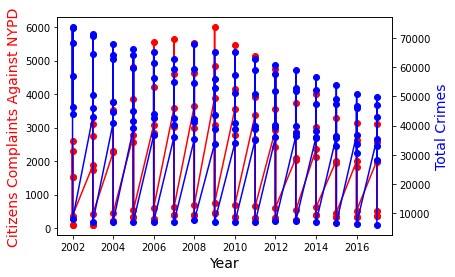

In [ ]:
fig,ax = plt.subplots()
ax.plot(NYCcrimes_complaints.Year, NYCcrimes_complaints["Citizens Complaints Against NYPD"], color="red", marker="o")
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Citizens Complaints Against NYPD",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(NYCcrimes_complaints.Year, NYCcrimes_complaints["Total Crimes"],color="blue",marker="o")
ax2.set_ylabel("Total Crimes",color="blue",fontsize=14)
plt.show()
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [ ]:
fig1 =go.Figure([go.Scatter(x=NYCcrimes_complaints['Year'], y=NYCcrimes_complaints['Total Crimes'], name='Total Crimes')])
fig2 =go.Figure([go.Scatter(x=NYCcrimes_complaints['Year'], y=NYCcrimes_complaints['Citizens Complaints Against NYPD'], name='Citizens Complaints Against NYPD')])
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(fig1.data[0], secondary_y=False)
fig.add_trace(fig2.data[0], secondary_y=True)
fig.update_layout(width=700, height=450, hovermode='x')
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=NYCcrimes_complaints['Year'],
        y=NYCcrimes_complaints['Citizens Complaints Against NYPD'],
        name='Citizens Complaints Against NYPD'
    ))

fig.add_trace(
    go.Scatter(
        x=NYCcrimes_complaints['Year'],
        y=NYCcrimes_complaints['Total Crimes'],
        name='Total Crimes'
    ))

fig.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig, filename = 'NYCCvC', auto_open=True)

'https://plotly.com/~Sid-Oya/23/'

## Conduct a confidence interval to check plausibility of my findings


In [ ]:
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return (mean, mean - moe, mean + moe)

In [ ]:
NYCcrimes_complaints['Citizens Complaints Against NYPD'].mean()

2013.1339285714287

In [ ]:

conf_int=stats.t.interval(0.95, 
                          NYCcrimes_complaints.shape[0],
                          loc = NYCcrimes_complaints['Citizens Complaints Against NYPD'].mean(),
                          scale = stats.sem(NYCcrimes_complaints['Citizens Complaints Against NYPD'])
                          )
conf_int

(1704.0866953504983, 2322.181161792359)

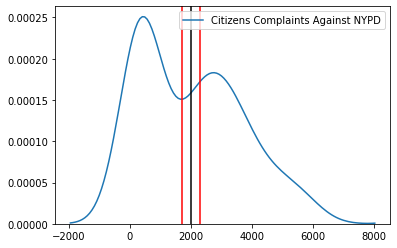

In [ ]:
sns.kdeplot(NYCcrimes_complaints['Citizens Complaints Against NYPD'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=NYCcrimes_complaints['Citizens Complaints Against NYPD'].mean(), color='k');

In [ ]:
NYCcrimes_complaints['Total Crimes'].mean()

42834.017857142855

In [ ]:
conf_int=stats.t.interval(0.95, 
                          NYCcrimes_complaints.shape[0],
                          loc = NYCcrimes_complaints['Total Crimes'].mean(),
                          scale = stats.sem(NYCcrimes_complaints['Total Crimes'])
                          )
conf_int

(39429.60454381675, 46238.43117046896)

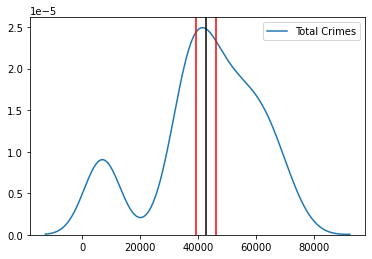

In [ ]:
sns.kdeplot(NYCcrimes_complaints['Total Crimes'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=NYCcrimes_complaints['Total Crimes'].mean(), color='k');

In [ ]:
NYCcrimes_complaints.head()

,Year,NYC,Citizens Complaints Against NYPD,County,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Total Crimes
0,2002,Bronx,1518,Bronx,14112.0,172.0,443.0,5215.0,8282.0,29923.0,5057.0,19585.0,5281.0,44035.0
1,2002,Brooklyn,2591,Kings,22466.0,221.0,636.0,9980.0,11629.0,51241.0,10139.0,32728.0,8374.0,73707.0
2,2002,Long Island,97,Nassau,5414.0,56.0,232.0,2256.0,2870.0,40984.0,5624.0,29664.0,5696.0,46398.0
3,2002,Long Island,97,Suffolk,6248.0,38.0,338.0,1992.0,3880.0,67166.0,10422.0,50516.0,6228.0,73414.0
4,2002,Manhattan,2312,New York,13211.0,84.0,290.0,5965.0,6872.0,54941.0,5771.0,45801.0,3369.0,68152.0


In [ ]:
NYCcrimes_complaints['Citizens Complaints Against NYPD'].sum()

225471

In [ ]:
NYCcrimes_complaints['Total Crimes'].sum()

4797410.0

## Null Hypothesis - Crime has decreased in NYC while Citizen Complaints against the NYPD has risen.
### Due to a small p-value - which indicates strong evidence against he null hypothesis - I reject the null hypothesis.


In [ ]:
ttest_ind(NYCcrimes_complaints['Total Crimes'], NYCcrimes_complaints['Citizens Complaints Against NYPD'] , nan_policy='omit')

Ttest_indResult(statistic=23.66050384270428, pvalue=1.2894385778152167e-62)

## There is a slight positive linear relationship between the rate of crime in NYC and citizens' complaints against the NYPD.


In [ ]:
NYCcrimes_complaints['Total Crimes'].corr(NYCcrimes_complaints['Citizens Complaints Against NYPD'])

0.3734196565241523